In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

####计算TESLA数据中CD8验证的肽段的亲和力预测得分与免疫原性的关系

In [12]:
def plot_box(filename,aimname,ymax):
    df = pd.read_csv(filename,sep="\t",header=0)
    response=df[df['response_type']=="CD8"][aimname]
    noresponse=df[df['response_type']=="negative"][aimname]  
    maxl=np.max(df[aimname])
    #print(noresponse)
    # 执行秩和检验（Mann-Whitney U 检验）
    statistic, p_value = mannwhitneyu(response, noresponse)
    # 打印结果
    print("Mann-Whitney U 检验结果：")
    print(f"统计量：{statistic}")
    print(f"p 值：{p_value}")

    # 执行 t 检验（独立样本 t 检验）
    statistic, p_value = ttest_ind(response, noresponse)
    # 打印结果
    print("独立样本 t 检验结果：")
    print(f"统计量：{statistic}")
    print(f"p 值：{p_value}")
    
    '''
    grouped_data = df.groupby('Response')['HLA'].apply(list)
    colors = ['red', 'blue']
    #print(grouped_data)
    # 创建一个新的图形，并设置大小
    plt.figure(figsize=(3, 5))

    # 绘制箱线图
    plt.boxplot(grouped_data,widths=0.4)
    # 设置横坐标刻度名称
    plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)
    '''
    plt.figure(figsize=(3, 4))
    # 按照组别分组
    grouped_data = [df[df['response_type'] == 'CD8'][aimname], df[df['response_type'] == 'negative'][aimname]]

    # 设置箱线图的颜色
    boxplot = plt.boxplot(grouped_data, widths=0.4, patch_artist=True)

    # 绘制箱线图
    # 设置每个箱体的颜色
    colors = ['#C4372E', '#AAAAAA']
    for box, color in zip(boxplot['boxes'], colors):
        box.set(facecolor=color)
    # 设置x轴标签
    plt.xticks([1, 2], ['CD8+', 'CD8-'])

    # 添加 x 轴标签和标题
    plt.xlabel('Response')
    plt.ylabel(aimname)
    title="Boxplot of "+aimname+" by Response"
    plt.title(title)
    plt.xticks()
    #ymax=maxl+maxl*0.2
    plt.ylim(0,ymax)
    pinfor="p-value="+str(round(p_value,9))
    plt.text(1.25, 1,pinfor)
    outplot="Table_"+aimname+"_TESTLA_boxplot.svg"
    outplot=outplot.replace(" ","_")
    plt.savefig(outplot)
    plt.show()

Mann-Whitney U 检验结果：
统计量：20197.0
p 值：7.912778554778956e-10
独立样本 t 检验结果：
统计量：5.8992139933481
p 值：5.485151321340376e-09


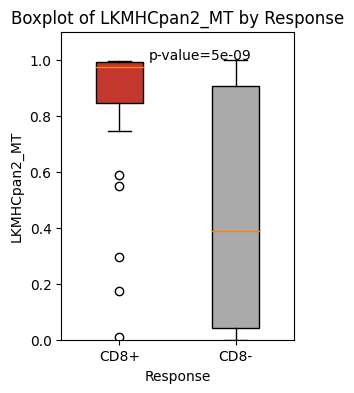

Mann-Whitney U 检验结果：
统计量：4256.5
p 值：8.516695100787651e-11
独立样本 t 检验结果：
统计量：-2.2080608371598704
p 值：0.02753634797114511


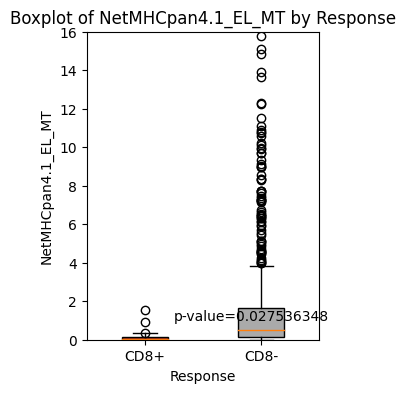

In [13]:
fileinput="/life/Project/liqing/02.Work/01.LNEA.toolkit/02.Neo_immunity/01.TESLA/00.data_example/Neopep_data_org_TESLA_Test_LK_Net_result_MT_LKMHCpan2.xls"
plot_box(fileinput,'LKMHCpan2_MT',1.1)
plot_box(fileinput,'NetMHCpan4.1_EL_MT',16)